<a href="https://colab.research.google.com/github/chadantomar/ML/blob/main/Video_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download youtube video

In [2]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00


In [3]:
from pytube import YouTube
youtube = YouTube("https://www.youtube.com/watch?v=YF_DzoTDO-0")

print(youtube.title)
video = youtube.streams.get_lowest_resolution()
video.download()

Road Safety: What are the causes of this accident || Cyberabad Traffic Police


'/content/Road Safety What are the causes of this accident  Cyberabad Traffic Police.mp4'


1. Read video from .mp4 file using opencv
2. get frames & its count
3. traverse in each frame
4. Identify frame rate

In [4]:
!pip install ffmpeg-python

In [ ]:
!pip install Ipython

In [13]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video("/content/accidentroad.mp4")

In [14]:
import cv2

In [15]:
#Frame details
cap= cv2.VideoCapture("/content/accidentroad.mp4")

In [16]:
framesCount= cap.get(cv2.CAP_PROP_FRAME_COUNT)
framesCount

888.0

In [17]:
height= cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width= cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height,width

(360.0, 640.0)

In [18]:
Frames_per_Second= cap.get(cv2.CAP_PROP_FPS)
Frames_per_Second

30.0

In [17]:
cap.release()

In [20]:
cap= cv2.VideoCapture("/content/accidentroad.mp4")
flag, img= cap.read()

In [21]:
flag,img.shape

(True, (360, 640, 3))

In [18]:
import matplotlib.pyplot as plt


Display first frame output image

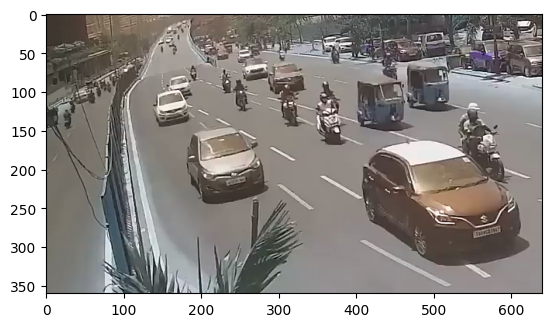

In [23]:
plt.imshow(img)
plt.show()

In [5]:
cap.release()


NameError: name 'cap' is not defined

In [19]:
cap= cv2.VideoCapture("/content/accidentroad.mp4")

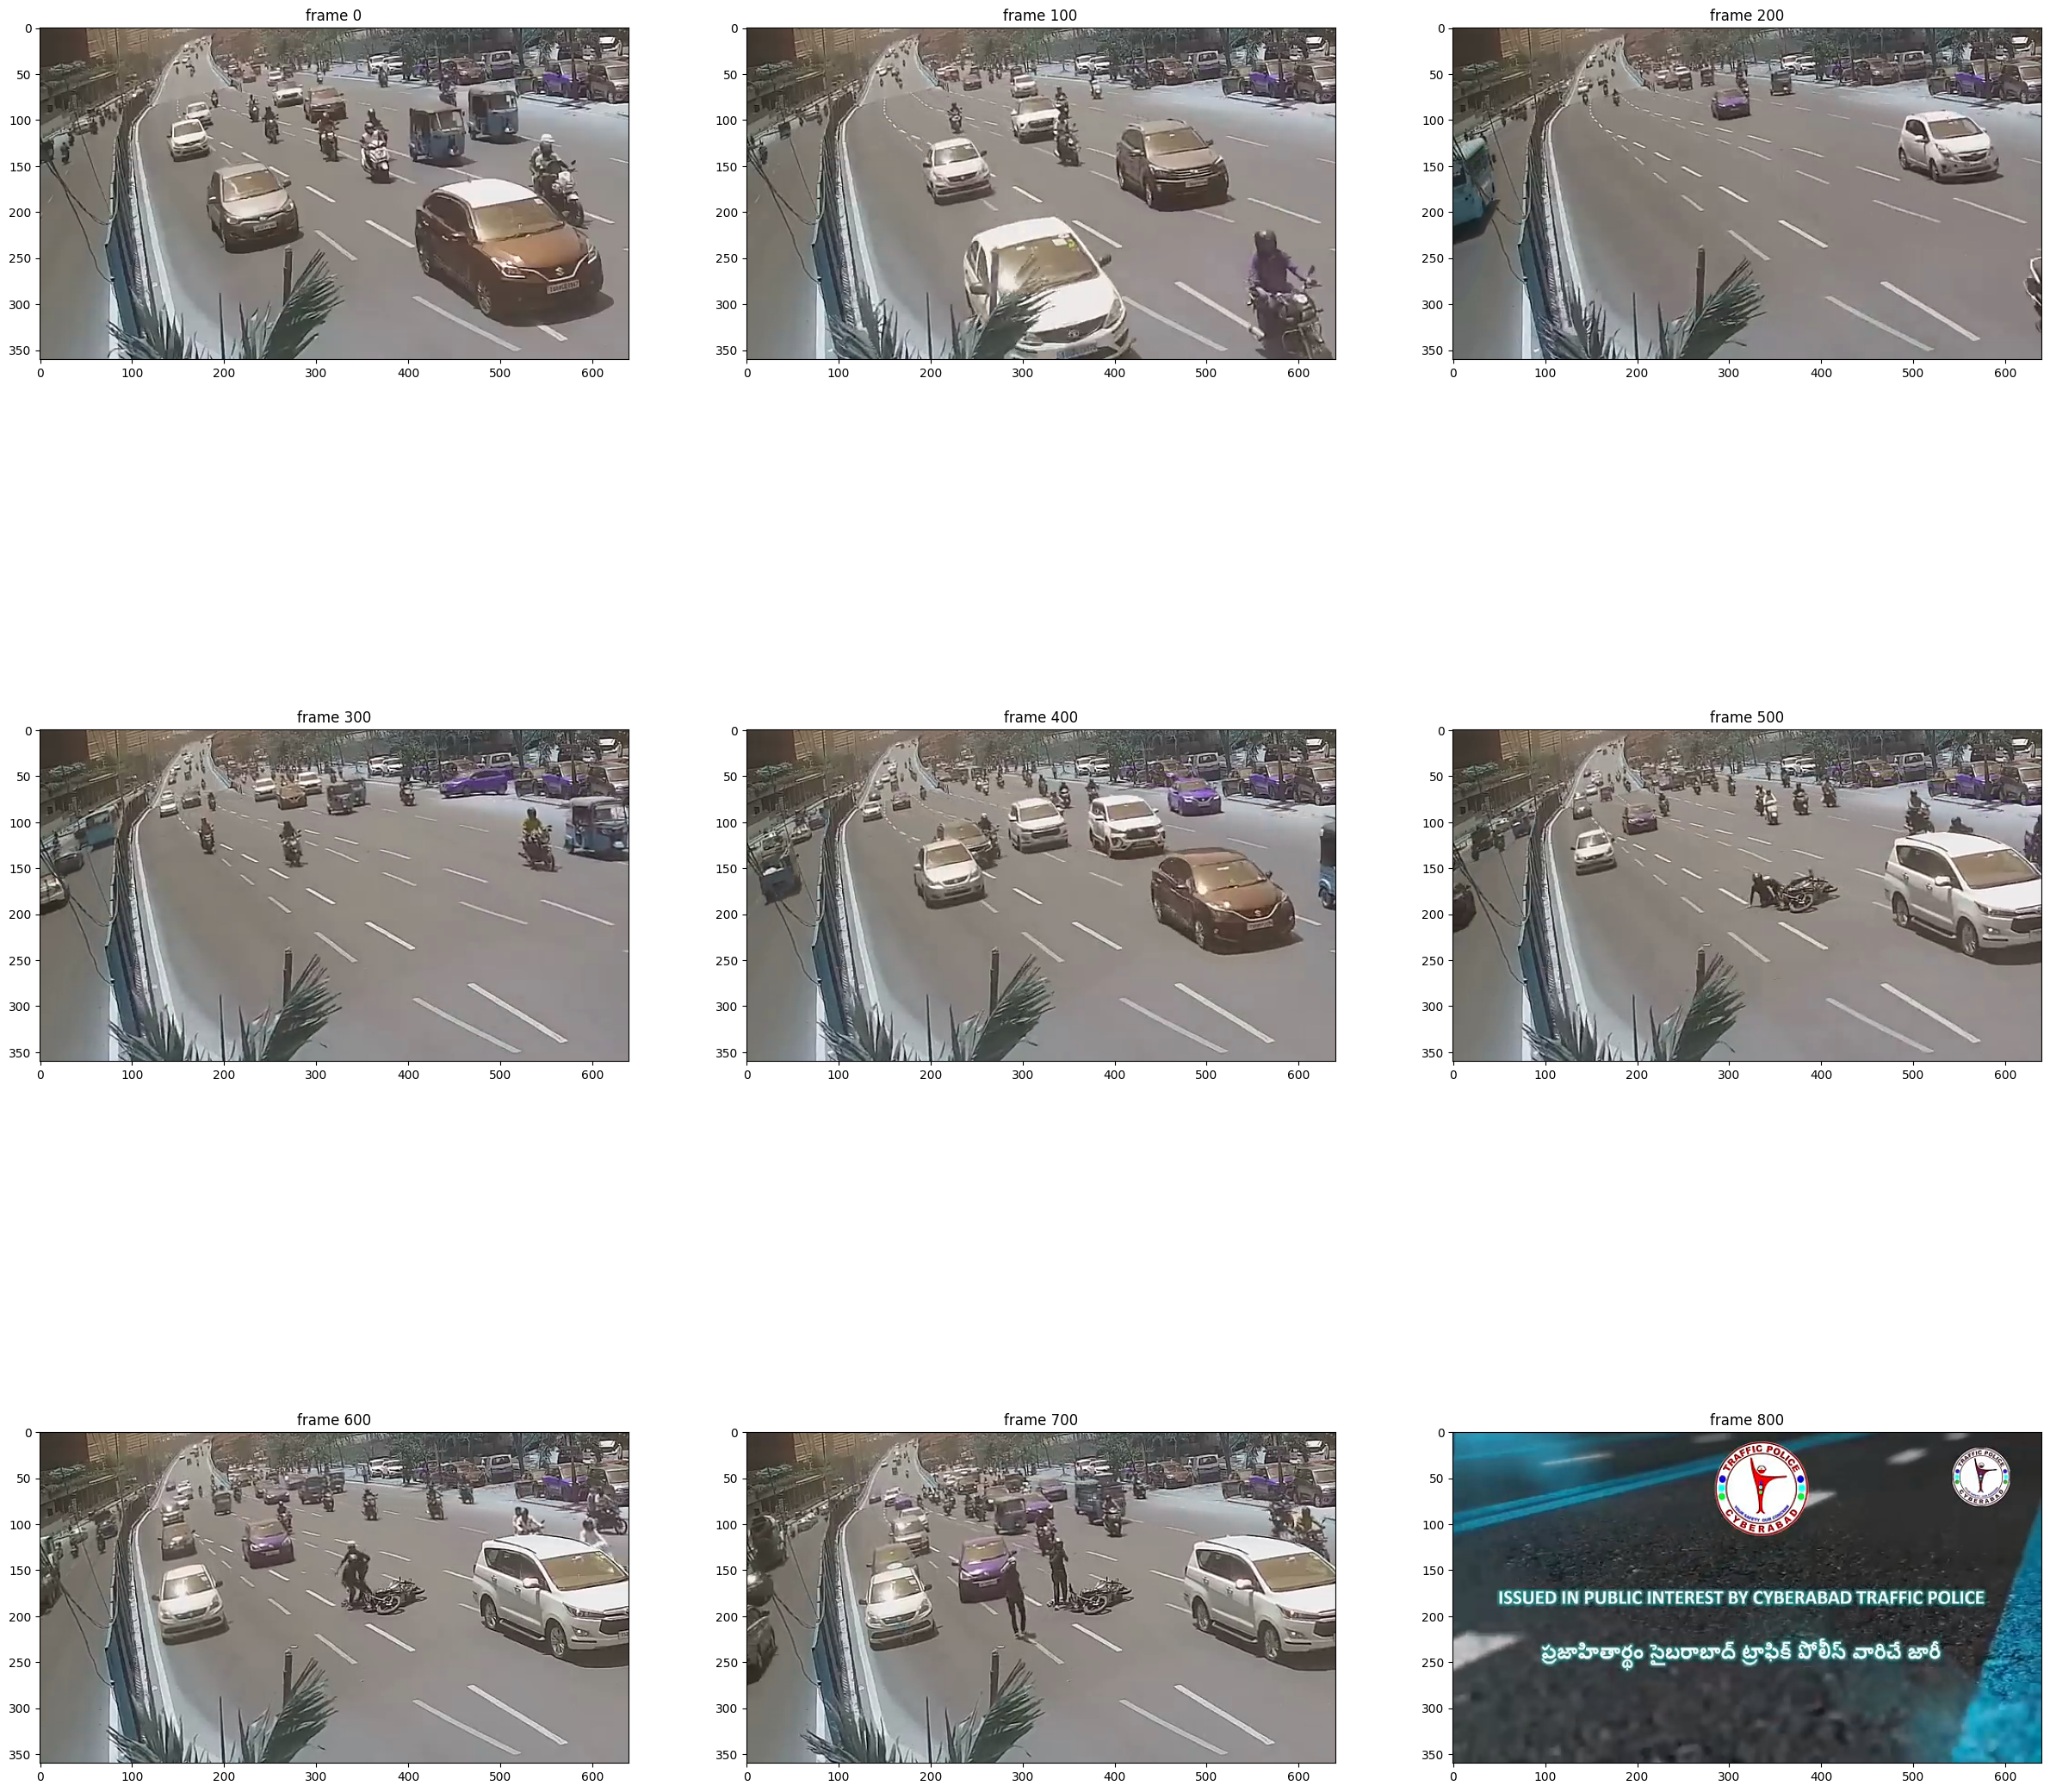

In [20]:
fig,axs  =plt.subplots(3,3,figsize=(30,30))
axs=axs.flatten()
count=0
for frame in range(int(framesCount)):

  flag, img= cap.read()
  if flag== False:
    break
  else:
    if frame % 100 ==0:

      axs[count].imshow(img)
      axs[count].set_title('frame '+str(frame))
      count+=1
plt.show()
cap.release()

Object Identification on roadaccident video **"You only look Ones"** YOLOv5

In [21]:
!mkdir ~/.kaggle

In [22]:
!mv '/content/kaggle.json' /root/.kaggle/

In [23]:
!chmod 600 /root/.kaggle/kaggle.json

In [24]:
!kaggle datasets download -d dataclusterlabs/indian-vehicle-dataset

100% 2.37G/2.37G [01:48<00:00, 30.7MB/s]
100% 2.37G/2.37G [01:48<00:00, 23.5MB/s]


In [ ]:
!unzip  indian-vehicle-dataset.zip

In [26]:
!pip3 install labelImg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 7.9 MB/s eta 0:00:00
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261520 sha256=06c4f3f066fa8a796b76cf11b4df18440ec6842148308be0798da7634f0727b9
  Stored in directory: /root/.cache/pip/wheels/d9/f0/1e/74c509495458cad13a0fda23fe605e643177625cf2b5c17b34
Successfully built labelImg


In [ ]:
!apt-get install -y pyqt5-dev-tools
!pip install lxml


In [33]:
!git clone https://github.com/tzutalin/labelImg


Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 26.25 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [34]:
%cd labelImg


/content/labelImg


In [35]:
!make qt5py3


pyrcc5 -o libs/resources.py resources.qrc


In [36]:
!python labelImg.py '/content/Vehicle_5_classes_sample/'


QObject::moveToThread: Current thread (0x5ad68a6ac5e0) is not the object's thread (0x5ad68aa633c0).
Cannot move to target thread (0x5ad68a6ac5e0)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



In [46]:
import xml.etree.ElementTree as ET
import os

# Function to convert XML annotations to YOLO format
def xml_to_yolo(xml_file, image_width, image_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    yolo_annotations = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        class_index = classes.index(class_name)

        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)

        # YOLO format: <class_index> <x_center> <y_center> <width> <height>
        x_center = (xmin + xmax) / 2.0 / image_width
        y_center = (ymin + ymax) / 2.0 / image_height
        width = (xmax - xmin) / image_width
        height = (ymax - ymin) / image_height

        yolo_annotations.append(f"{class_index} {x_center} {y_center} {width} {height}")

    return yolo_annotations

# Directory containing XML annotations
xml_dir = '/content/annotation/annotation'
# Directory to save YOLO annotations
yolo_dir = '/content/yolo_annotations'
# Image dimensions (adjust according to your images)
image_width = 400
image_height = 400
# Classes (adjust according to your dataset)
classes = ['auto', 'bus', 'tempo','tractor','truck','car','two_wheelers','vehicle_truck','bicycle']

# Ensure the directory exists
os.makedirs(yolo_dir, exist_ok=True)

# Convert each XML annotation to YOLO format and save
for dir in os.listdir(xml_dir):
  for xml_file in os.listdir(xml_dir+'/'+dir):
    if xml_file.endswith('.xml'):
        image_name = os.path.splitext(xml_file)[0] + '.jpg'  # Assuming JPEG images
        yolo_annotations = xml_to_yolo(os.path.join(xml_dir,dir, xml_file), image_width, image_height)
        with open(os.path.join(yolo_dir, os.path.splitext(xml_file)[0] + '.txt'), 'w') as f:
            for annotation in yolo_annotations:
                f.write(annotation + '\n')


Open https://github.com/ultralytics/yolov5 in colab & connect

In [52]:
%cd /content

/content


In [53]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16413, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16413 (delta 0), reused 4 (delta 0), pack-reused 16408
Receiving objects: 100% (16413/16413), 14.90 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (11265/11265), done.


In [54]:
%cd yolov5

/content/yolov5


In [55]:
!pip install -qr requirements.txt comet_ml  # install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.8/257.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


OPen /data/colo128.yaml

In [63]:
!mv /content/yolo/train/* /content/yolo/images/train/

In [65]:
!ls /content/yolo/images/train | shuf -n 30 | xargs -I{} mv /content/yolo/images/train/{} /content/yolo/images/val/

In [66]:
!mv /content/yolo/val/* /content/yolo/labels/train/

In [67]:
!ls /content/yolo/labels/train | shuf -n 30 | xargs -I{} mv /content/yolo/labels/train/{} /content/yolo/labels/val/

Modify colo128.yaml file with path of train and val

In [69]:
%cd /content/yolov5

/content/yolov5


In [73]:
!python train.py --img 640 --batch 2 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

2024-02-09 20:14:20.105243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 20:14:20.105320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 20:14:20.107487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optim